Mean Absolute Error: 21.65925848208283
Root Mean Squared Error: 35.94973423262326
R-squared: -0.15742453727993766


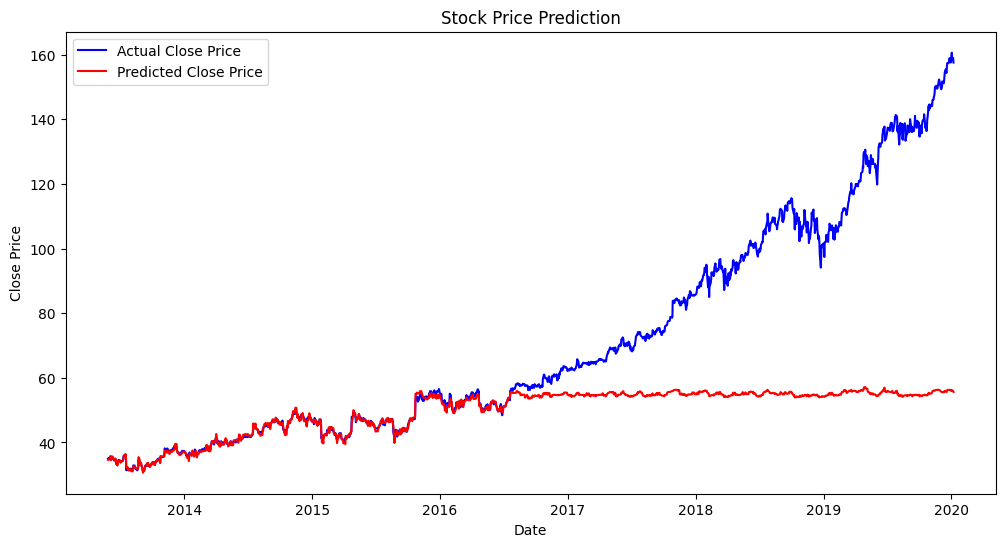

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Data Collection
data = pd.read_csv('/content/MSFT.csv')

# Data Preprocessing
# Handle missing values, convert date to datetime, and drop irrelevant columns
data.dropna(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Open', 'Close', 'Volume']]

# Feature Engineering
# Calculate the 50-day and 200-day moving averages
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling (window=14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
data['RSI'] = rsi

# Calculate Moving Average Convergence Divergence (MACD)
short_ema = data['Close'].ewm(span=12, adjust=False).mean()
long_ema = data['Close'].ewm(span=26, adjust=False).mean()
macd = short_ema - long_ema
signal = macd.ewm(span=9, adjust=False).mean()
data['MACD'] = macd
data['MACD_Signal'] = signal

# Drop rows with missing values due to rolling windows
data.dropna(inplace=True)

# Model Selection
# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Select a model (Random Forest Regressor in this example)
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Model Training
X_train = train_data.drop('Close', axis=1)
y_train = train_data['Close']
X_test = test_data.drop('Close', axis=1)
y_test = test_data['Close']

model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label='Actual Close Price', color='blue')
plt.plot(test_data.index, y_pred, label='Predicted Close Price', color='red')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()
